# Audio Signal Processing 

* loading an audio file
* sampling rate, duration
* plotting





In [ ]:
# import all necessary libraries 
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt 

In [ ]:
# set the path to the audio file
file_path = "kazakh_utterance.mp3"

In [ ]:
# play the audio file
ipd.Audio(file_path)

To play an audio in your local machine, you can use any other python library.
For example, playsound, simpleaudio, pygame, vlc, and many others.

In [ ]:
# display the information about the audio file
! ffprobe kazakh_utterance.mp3

ffprobe version 3.4.8-0ubuntu0.2 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

"ffprobe" is a simple multimedia stream analyzer. You can use it to output all kinds of information about an input audio file including duration, sampling rate, number of channels, etc. It is also useful for gathering specific information about an input to be used in a script. Note that there are many other tools that can extract audio information and you can use whichever you like.

## Load the audio file

We will use the [Librosa](https://librosa.org/) library to perform the signal processing operations.

The first operation that we will perform is the file loading.
The loaded audio will be represented as a time series data (one-dimensional numpy array of floating-point values). The *audio[t]* corresponds to amplitude of the waveform at sample *t*.

The variable **sr** will store the sampling rate of the loaded audio, i.e. the number of samples per second of audio.
By default, the audio is resampled to 22,050 Hz at load time. Note that the original audio's sampling rate is 48,000 Hz, thus, we downsampled the audio to 22,050 Hz.

In [ ]:
audio, sr = librosa.load(file_path)
print("Type: ", type(audio))  # python data type
print("Size: ", len(audio))   # or print(audio.size), total number of samples
print("The first sample: ", audio[0]) # the value of the first sample
print("Sample type: ", type(audio[0]))  # python data type of a sample
print("Sampling rate: ", sr)   # sampling rate of the loaded audio

Type:  <class 'numpy.ndarray'>
Size:  200435
The first sample:  0.0005551429
Sample type:  <class 'numpy.float32'>
Sampling rate:  22050


## Your turn - compute the sampling period

In [ ]:
# write your code here.   => period=1/sampling rate
# Sampling period, i.e. time duration between two samples
period = 1/sr

In [ ]:
# check you code
print(f"Period: {period} sec")

Period: 4.5351473922902495e-05 sec


**Expected output**

Period: 4.5351473922902495e-05 sec

## Your turn - compute the total audio duration

In [ ]:
# write your code here
# Total duration of the audio signal
duration = period * len(audio)

In [ ]:
# check you code 
# I noticed that the results were slightly different than the expected output, as the sample itself was 9.09 seconds.
print(f"Duration: {duration} sec")

Duration: 9.09002267573696 sec


**Expected output**

Duration: 7.3100226757369615 sec

## Your turn - find the minimum and maximum signal values

In [ ]:
# write your code here (hint: use numpy functions)
max_value = max(audio)      # the maximum amplitude value in audio signal
min_value = min(audio)       # the minimum amplitude value in audio signal

In [ ]:
# check you code
print("Max:", max_value)
print("Min:", min_value)

Max: 0.67479163
Min: -0.72820544


**Expected output**

Max: 0.68432844

Min: -0.7291171

## Plot the time-domain signal

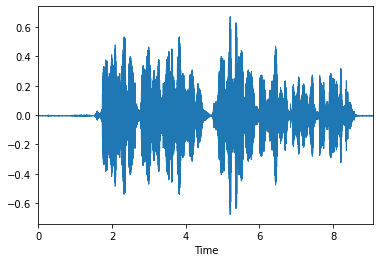

In [ ]:
# Plot the time-domain signal using librosa
librosa.display.waveplot(audio)

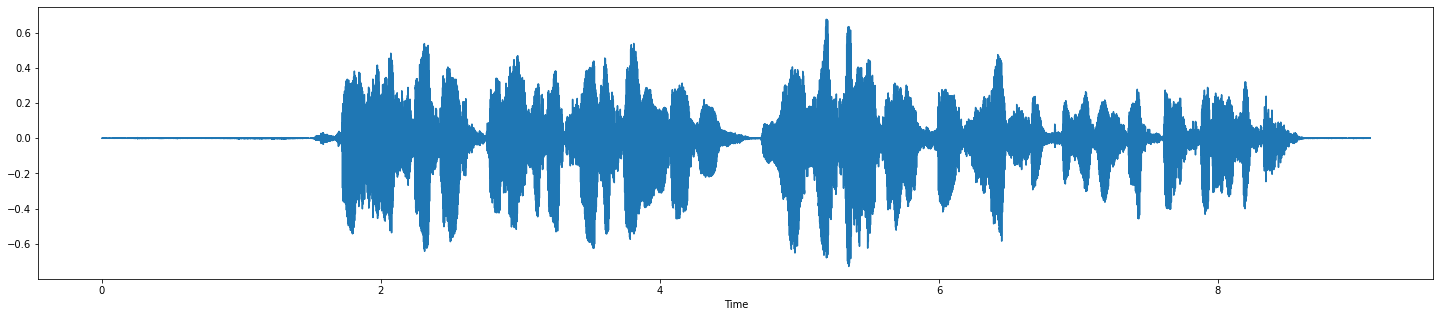

In [ ]:
# Plot the time-domain signal using matplotlib
time  = [period*i for i in range(audio.size)]
#time = librosa.frames_to_time(range(audio.size), sr=sr, hop_length=1)  # try librosa library to compute time steps
plt.figure(figsize=(25, 5))  # set the figure size
plt.plot(time, audio)
#plt.plot(time[:100], audio[:100],"bo")   # print the first 100 samples
plt.xlabel("Time")
plt.show()

In [ ]:
# let's compare time steps computed using our python implementation and librosa
time  = [period*i for i in range(audio.size)]
time_librosa = librosa.frames_to_time(range(audio.size), sr=sr, hop_length=1)

for i in range(20):
  print(f"{i}: {time[i]} \t {time_librosa[i]}")

# Notice that the librosa's implementation is almost similar to ours (check the samples at position 15 which has slight difference).

0: 0.0 	 0.0
1: 4.5351473922902495e-05 	 4.5351473922902495e-05
2: 9.070294784580499e-05 	 9.070294784580499e-05
3: 0.00013605442176870748 	 0.00013605442176870748
4: 0.00018140589569160998 	 0.00018140589569160998
5: 0.00022675736961451248 	 0.00022675736961451248
6: 0.00027210884353741496 	 0.00027210884353741496
7: 0.00031746031746031746 	 0.00031746031746031746
8: 0.00036281179138321996 	 0.00036281179138321996
9: 0.00040816326530612246 	 0.00040816326530612246
10: 0.00045351473922902497 	 0.00045351473922902497
11: 0.0004988662131519275 	 0.0004988662131519275
12: 0.0005442176870748299 	 0.0005442176870748299
13: 0.0005895691609977325 	 0.0005895691609977325
14: 0.0006349206349206349 	 0.0006349206349206349
15: 0.0006802721088435375 	 0.0006802721088435374
16: 0.0007256235827664399 	 0.0007256235827664399
17: 0.0007709750566893424 	 0.0007709750566893424
18: 0.0008163265306122449 	 0.0008163265306122449
19: 0.0008616780045351474 	 0.0008616780045351474


## Extracting time-domain features

We will learn to extract two time-domain feature types: amplitude envelope (AE) and root mean square (RMS) energy. We will try both librosa and our own implementations.

The first step is to split the input audio signal into the frames, i.e. framing. A frame is a short signal segment (e.g. 25 ms).

Next, from each frame we will extract a single feature value / vector / matrix / tensor.

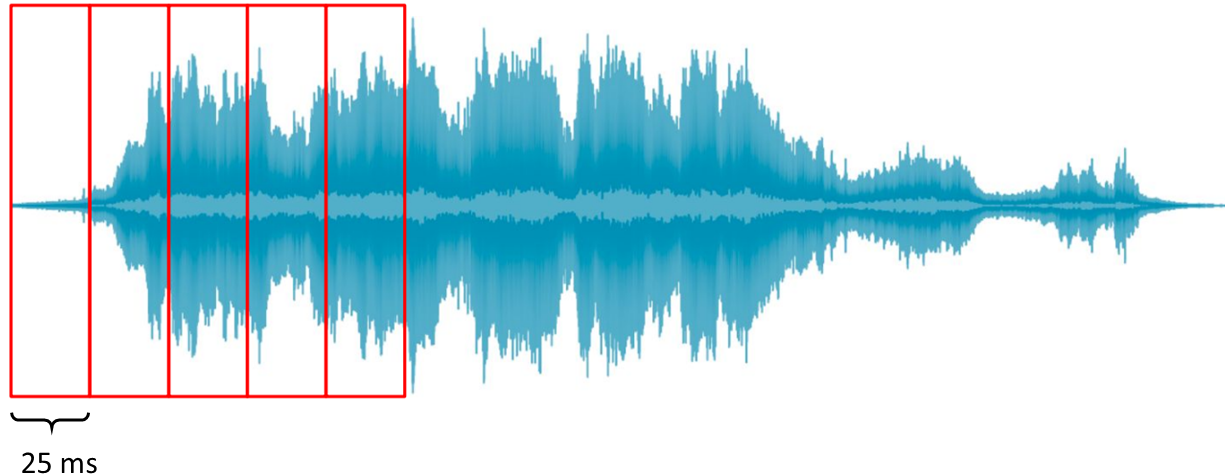

### Amplitude envelope feature

Maximum amplitude value of all samples in a frame.

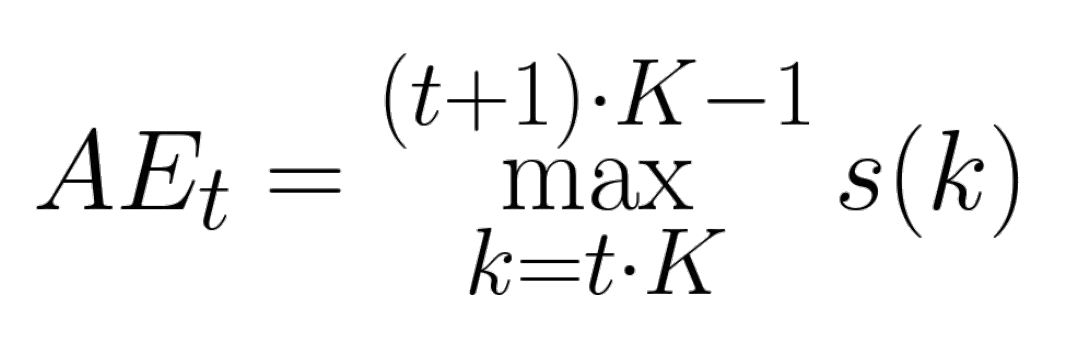

$AE_t$ - amplitude envelope at frame $t$

$s(k)$ - amplitude of $k$-th sample

$K$ - frame size (number of samples in a single frame)

$k=t\cdot K$ - first sample of frame $t$ 

$(t+1)\cdot K-1$ - last sample of frame $t$


In amplitude envelope, each frame is represented by its largest sample value, i.e. from each frame we will extract a single value.


In [ ]:
# calculate the amplitude envelope from the non-overlapping frames
def amplitude_envelope(signal, frame_length):
  amplitude_envelope = []
  # calculate AE for each frame
  for i in range(0, len(signal), frame_length):
    current_frame_AE = max(signal[i:i+frame_length])
    amplitude_envelope.append(current_frame_AE)
  return np.array(amplitude_envelope)

In [ ]:
FRAME_LENGTH = 1024

AE_audio = amplitude_envelope(audio, FRAME_LENGTH)
print("Size: ", len(AE_audio))   # total number of AE features

Size:  196


#### AE features from the overlapping frames

In [ ]:
# calculate the amplitude envelope from the overlapping 

def amplitude_envelope_ol(signal, frame_length, hop_length):
  amplitude_envelope = []
  # calculate AE for each frame
  for i in range(0, len(signal), hop_length):
    current_frame_AE = max(signal[i:i+frame_length])
    amplitude_envelope.append(current_frame_AE)
  return np.array(amplitude_envelope)

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

AE_OL_audio = amplitude_envelope_ol(audio, FRAME_LENGTH, HOP_LENGTH)
print("Size: ", len(AE_OL_audio))   # total number of AE features

Size:  392


### Your turn - optimize the AE computation function

Rewrite the "amplitude_envelope(signal, frame_size)" function using a single line.

In [ ]:
# Write your code here => list comprehension  optimized the function
def amplitude_envelope_1line(signal, frame_length):
  amplitude_envelope = [max(signal[i:i+frame_length]) for i in range(0, len(signal), frame_length)]
  return  np.array(amplitude_envelope)

In [ ]:
# Check your code
FRAME_LENGTH = 1024

AE_audio = amplitude_envelope(audio, FRAME_LENGTH)
AE_audio_1line = amplitude_envelope_1line(audio, FRAME_LENGTH)
# comparing the values of the arrays
print((AE_audio == AE_audio_1line).all())

True


**Expected output**

True

### Visualize AE

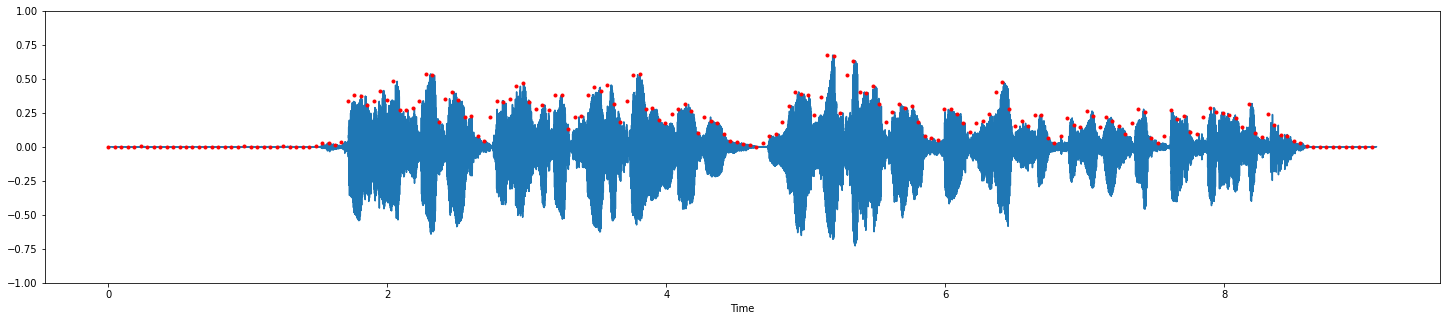

In [ ]:
# Plot the time-domain signal using matplotlib
time  = [period*i for i in range(audio.size)]
time_AE = [period*i for i in range(0, audio.size, FRAME_LENGTH)]
#time = librosa.frames_to_time(range(audio.size), sr=sr, hop_length=1)  # try librosa library to compute time steps
plt.figure(figsize=(25, 5))  # set the figure size
plt.plot(time, audio)
plt.plot(time_AE, AE_audio, "r.")
plt.xlabel("Time")
plt.ylim(-1,1)
plt.show()

### Extracting RMSE

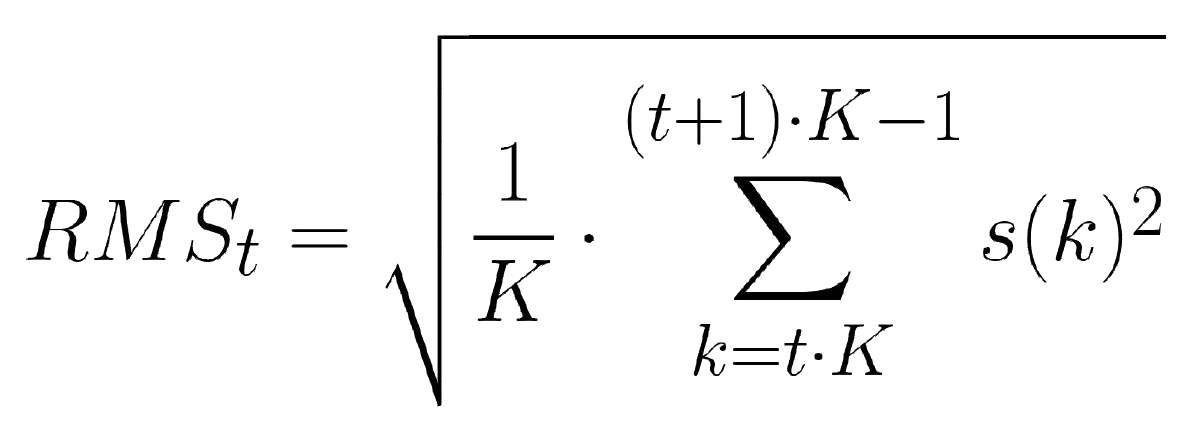

#### Extract RMSE using librosa

In [ ]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

RMSE_audio = librosa.feature.rmse(audio, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [ ]:
print(RMSE_audio.shape)

(392,)


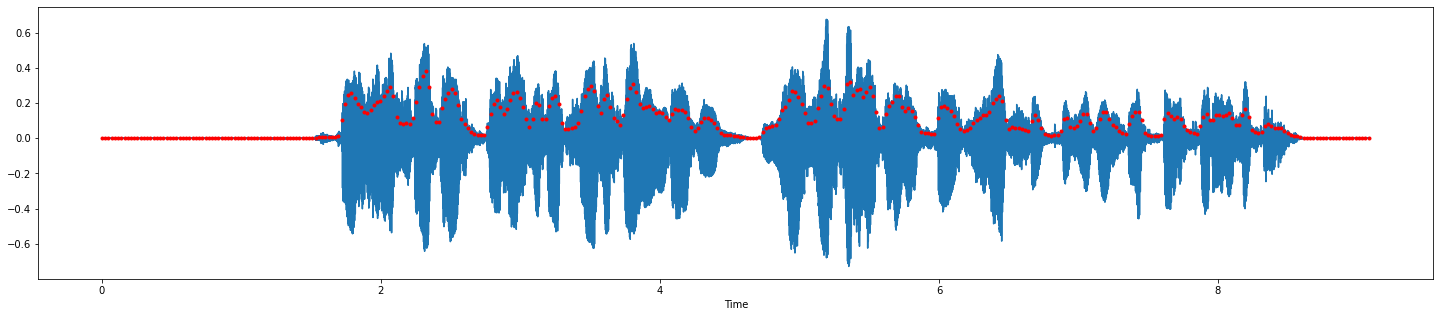

In [ ]:
# Plot the time-domain signal using matplotlib
time  = [period*i for i in range(audio.size)]
time_RMSE = [period*i for i in range(0, audio.size, HOP_LENGTH)]
#time_RMSE = librosa.frames_to_time(range(RMSE_audio.size), sr=sr, hop_length=HOP_LENGTH)  # try librosa library to compute time steps
plt.figure(figsize=(25, 5))  # set the figure size
plt.plot(time, audio)
plt.plot(time_RMSE, RMSE_audio, "r.")
plt.xlabel("Time")
plt.show()

### Your turn - write the RMSE function

In [ ]:
# your code
# The function should extract the RMSE features from the overlapping frames (hint: see the AE feature extraction code)
def rmse(signal, frame_length, hop_length):
  rmse = []
  # calculate rmse for each frame
  for i in range(0, len(signal), hop_length): 
    currentFrame = np.sqrt(sum(pow(signal[i:i+frame_length],2)) / frame_length) #current frame of RMSE from the formula
    rmse.append(currentFrame)
  return np.array(rmse)  

In [ ]:
# check you code
RMSE_audio2 = rmse(audio, FRAME_LENGTH, HOP_LENGTH)
print(RMSE_audio2.shape==RMSE_audio.shape)

True


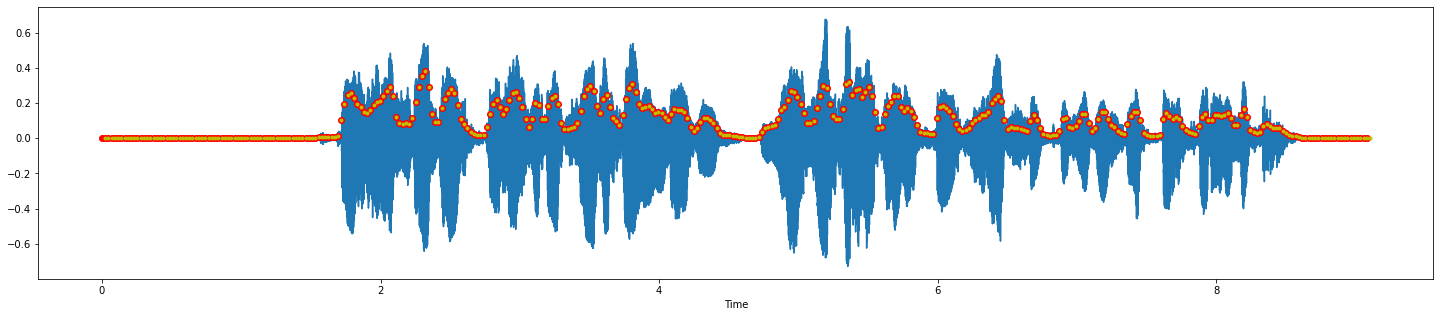

In [ ]:
# Plot the time-domain signal using matplotlib
time  = [period*i for i in range(audio.size)]
#time_RMSE = [period*i for i in range(0, audio.size, HOP_LENGTH)]
time_RMSE = librosa.frames_to_time(range(RMSE_audio.size), sr=sr, hop_length=HOP_LENGTH)  # try librosa library to compute time steps
#time_RMSE2 = time_RMSE
time_RMSE2 = time_RMSE + 512*period
plt.figure(figsize=(25, 5))  # set the figure size
plt.plot(time, audio)
plt.plot(time_RMSE, RMSE_audio, "ro")
plt.plot(time_RMSE2, RMSE_audio2, "y.")
plt.xlabel("Time")
plt.show()

**Expected Output**

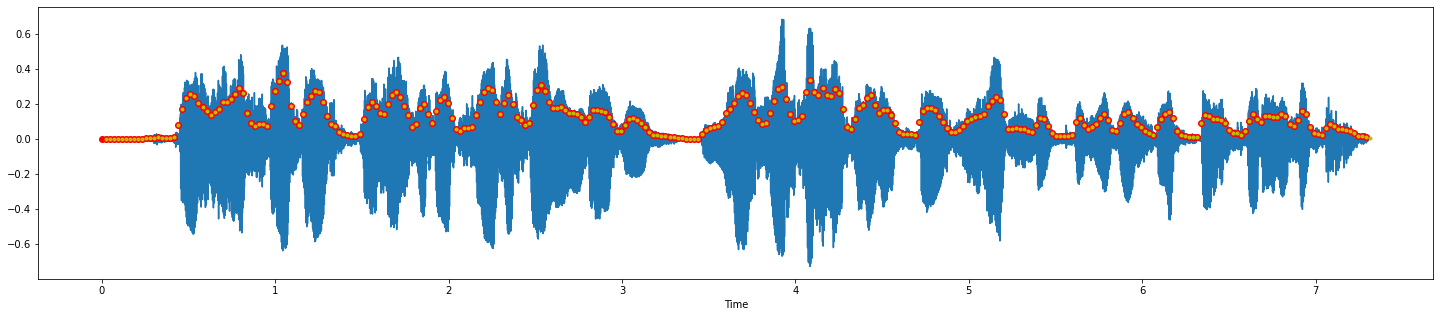